In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

%matplotlib inline

In [5]:
df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
print(df.shape)

(8760, 14)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
print(len(df))

8760


In [15]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [16]:
print(len(df[df.duplicated()]))

0


In [17]:
import datetime as dt

df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Creating a new column "weekdays_weekend" and dropping the columns "Date," "day," and "year"
df['week'] = df['day'].apply(lambda x: "weekend" if x in ['Saturday', 'Sunday'] else "weekday")
df = df.drop(columns=['Date', 'day', 'year'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date,month,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,weekday


C:\Users\Dell\AppData\Local\Temp\ipykernel_24432\1937943039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


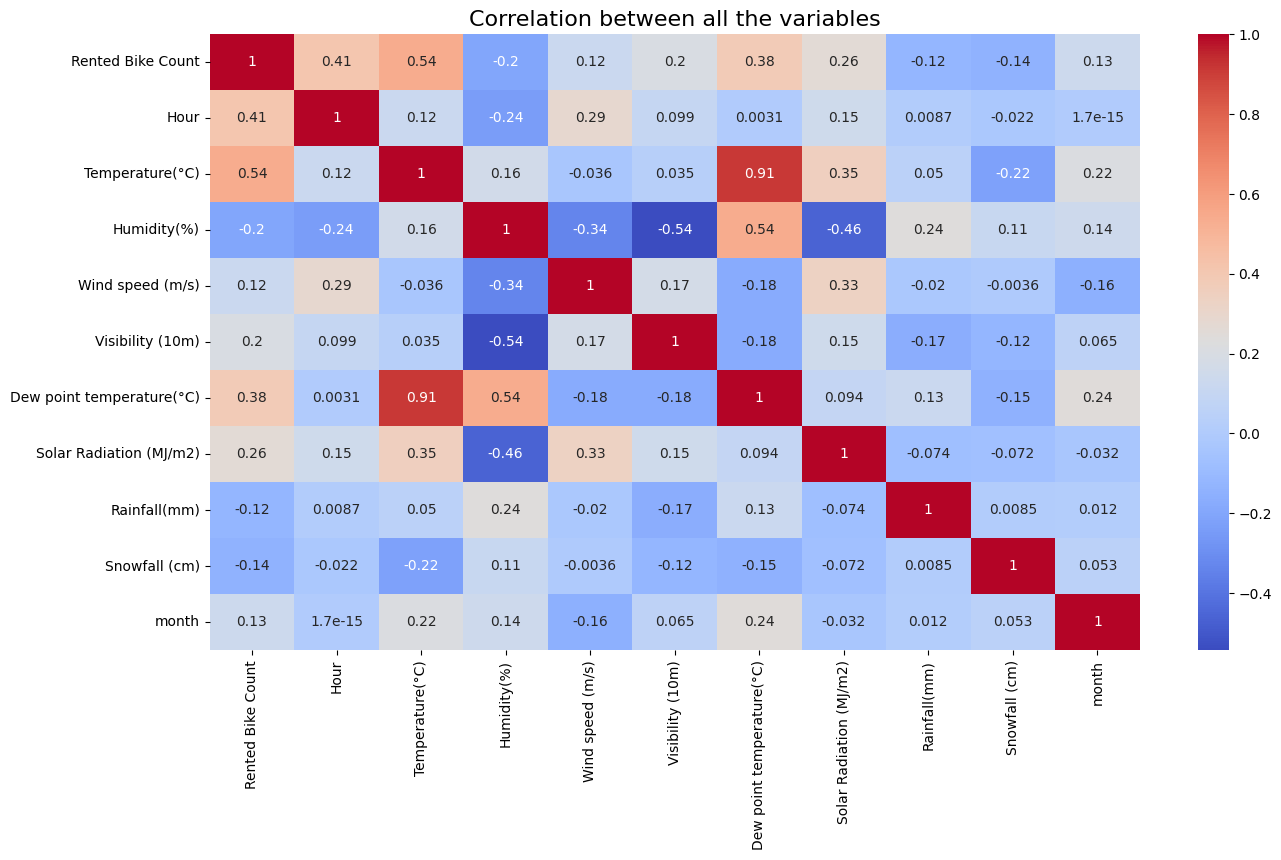

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the variables', size=16)
plt.show()

In [19]:
df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

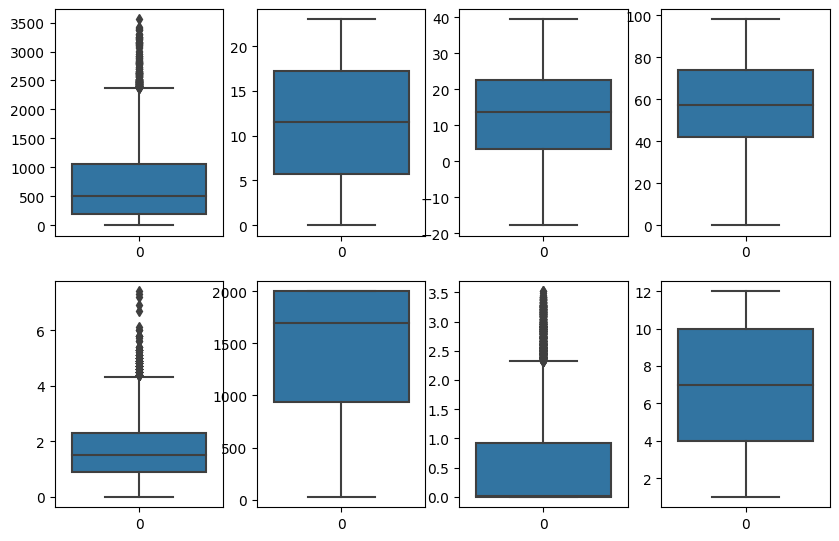

In [20]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

In [21]:
features = list(df.columns)
list_0 = ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'date', 'month', 'week']
new_features = [x for x in features if x not in list_0]

Q1 = df[new_features].quantile(0.25)
Q3 = df[new_features].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = df[new_features].apply(lambda x: ((x < (Q1.loc[x.name] - 1.5 * IQR.loc[x.name])) | (x > (Q3.loc[x.name] + 1.5 * IQR.loc[x.name]))), axis=0).any(axis=1)

df = df.loc[~outlier_mask]

In [22]:
df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

C:\Users\Dell\AppData\Local\Temp\ipykernel_24432\2068422514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


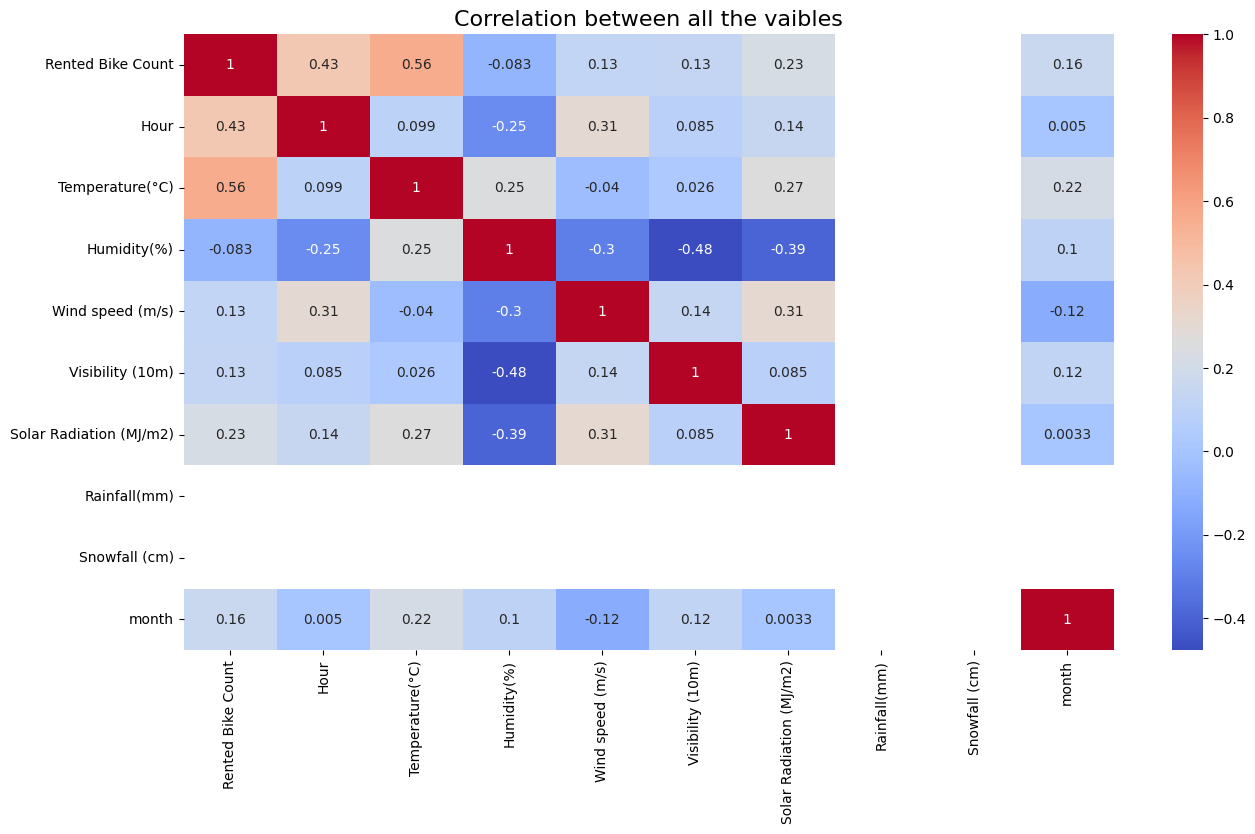

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6922 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rented Bike Count        6922 non-null   int64         
 1   Hour                     6922 non-null   int64         
 2   Temperature(°C)          6922 non-null   float64       
 3   Humidity(%)              6922 non-null   int64         
 4   Wind speed (m/s)         6922 non-null   float64       
 5   Visibility (10m)         6922 non-null   int64         
 6   Solar Radiation (MJ/m2)  6922 non-null   float64       
 7   Rainfall(mm)             6922 non-null   float64       
 8   Snowfall (cm)            6922 non-null   float64       
 9   Seasons                  6922 non-null   object        
 10  Holiday                  6922 non-null   object        
 11  Functioning Day          6922 non-null   object        
 12  date                     6922 non-

[Text(0.5, 1.0, 'Count of Rented bikes according to month ')]

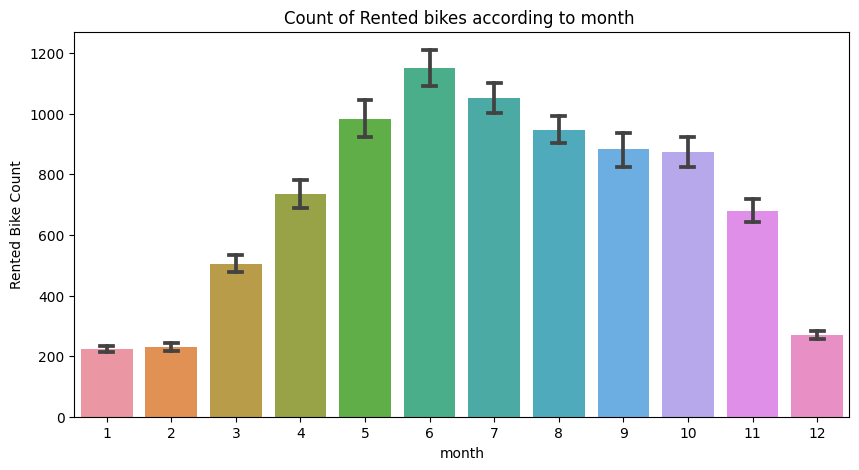

In [25]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

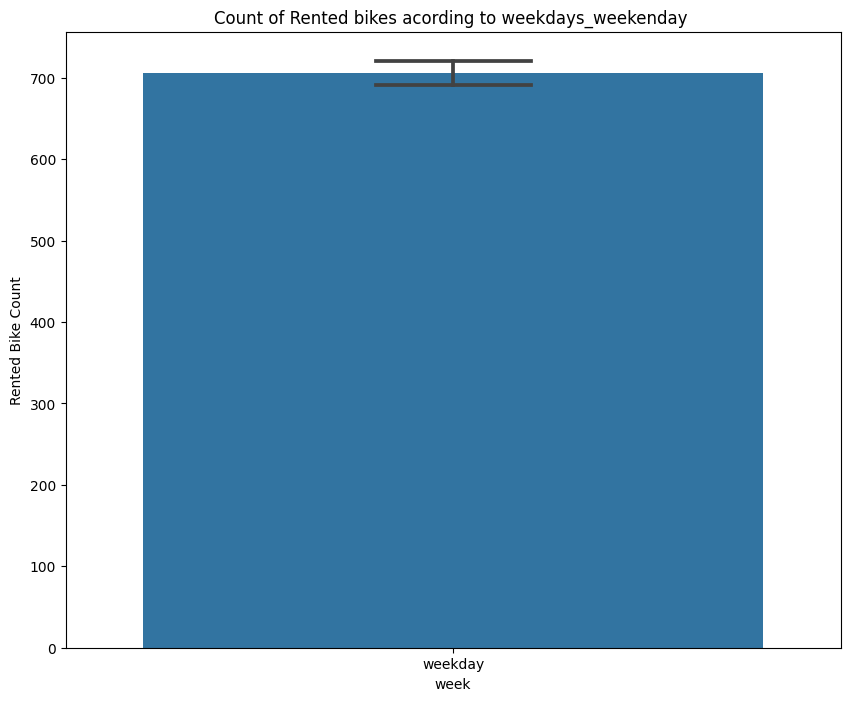

In [26]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='week',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

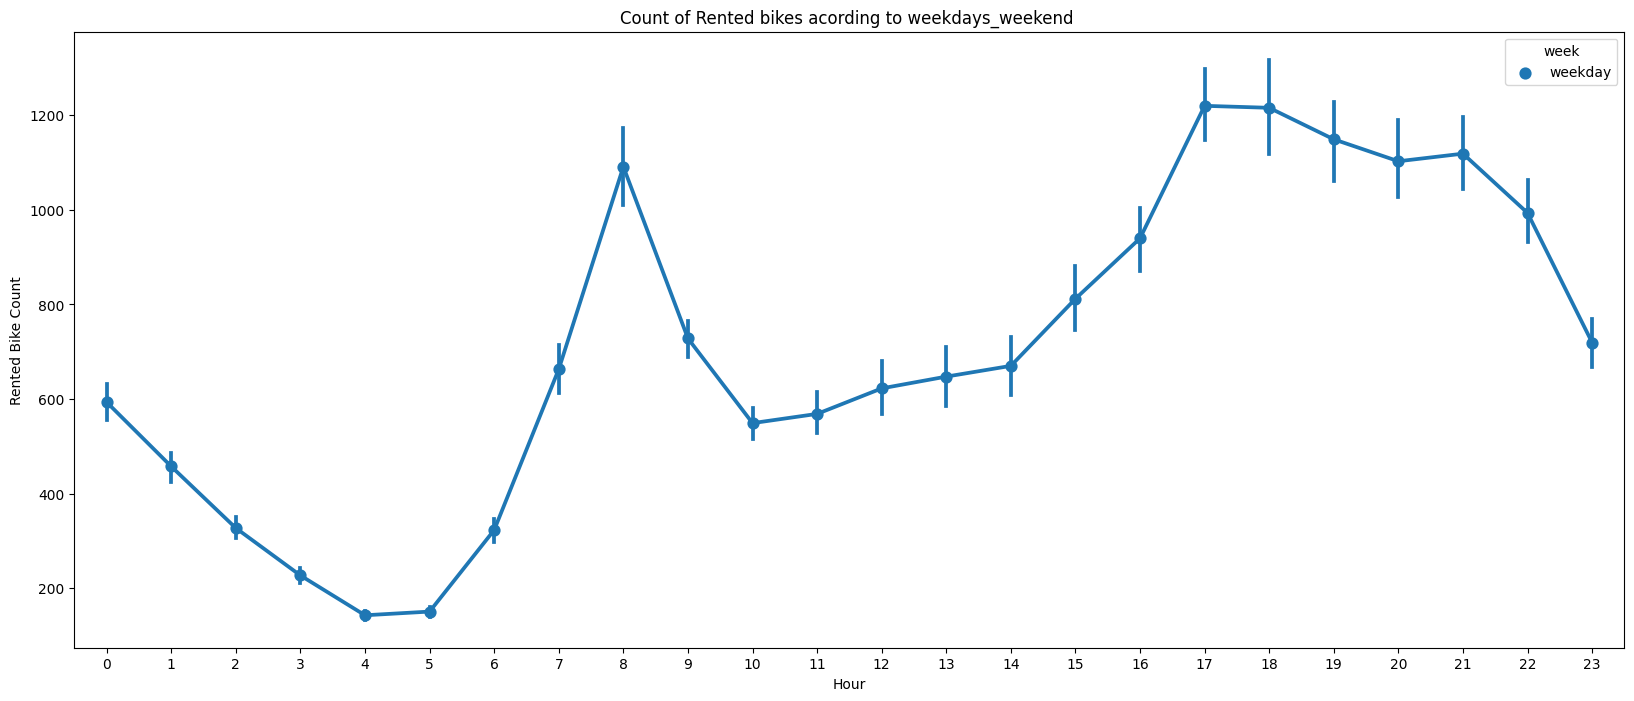

In [27]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='week',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

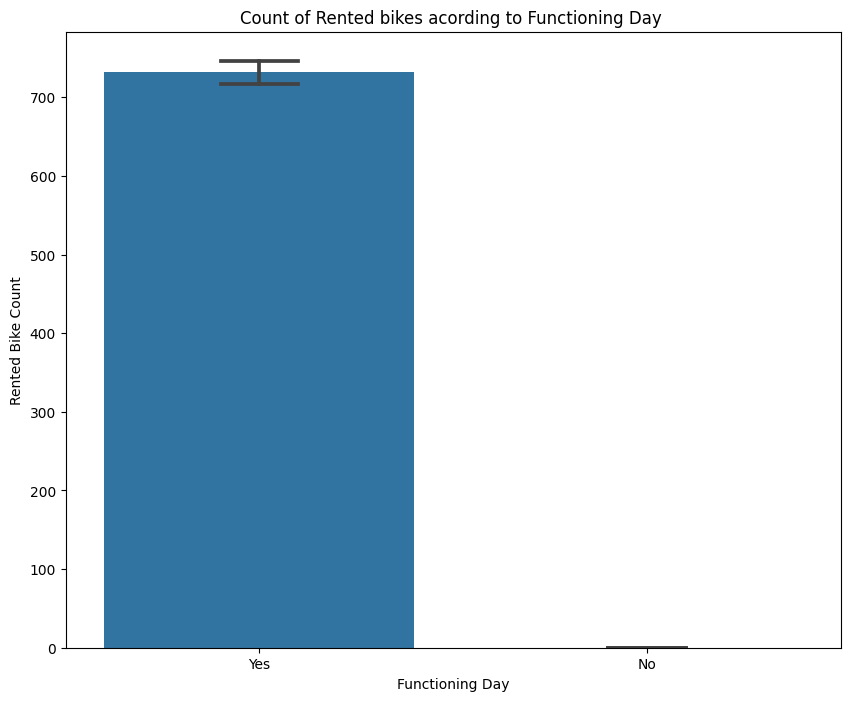

In [28]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

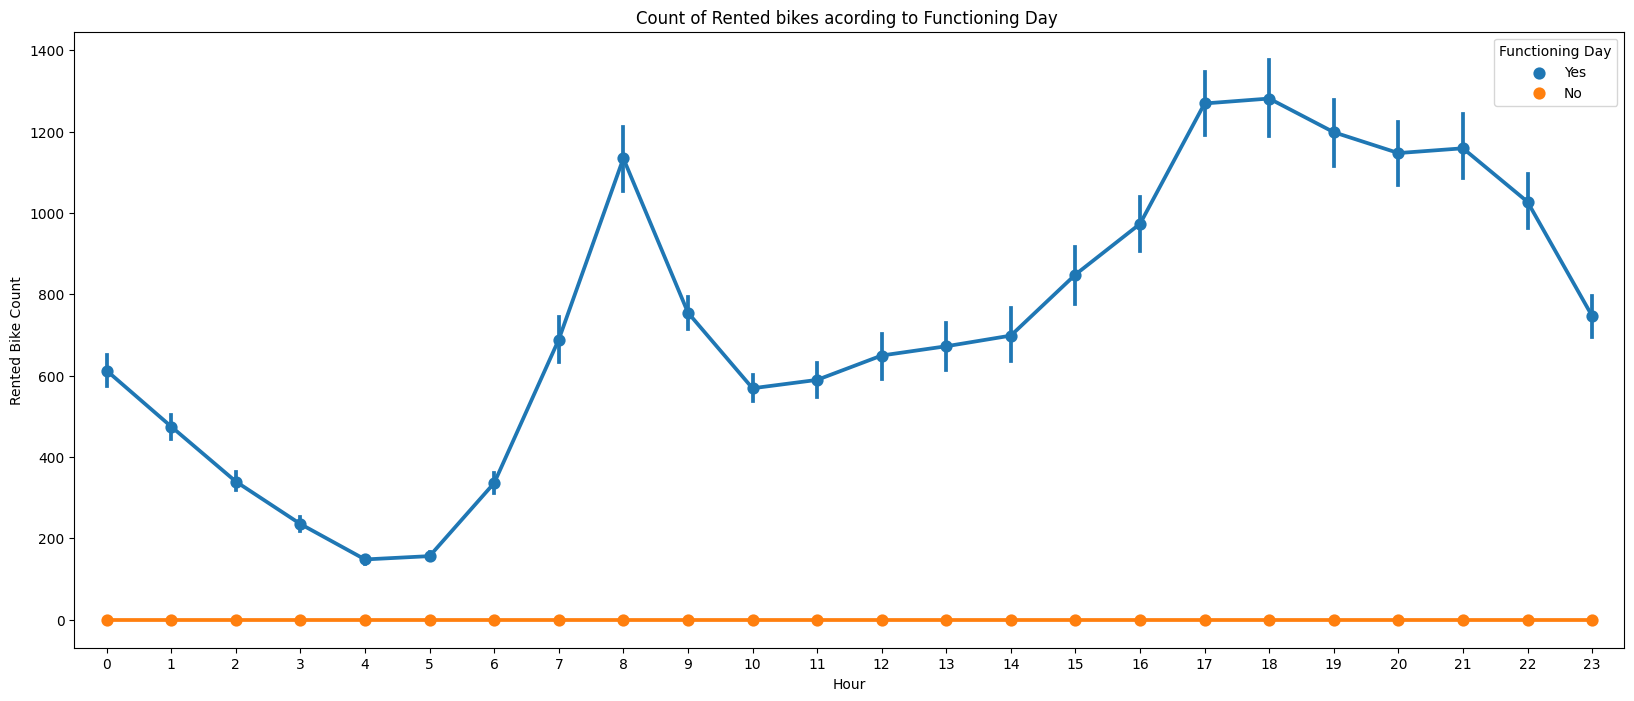

In [29]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

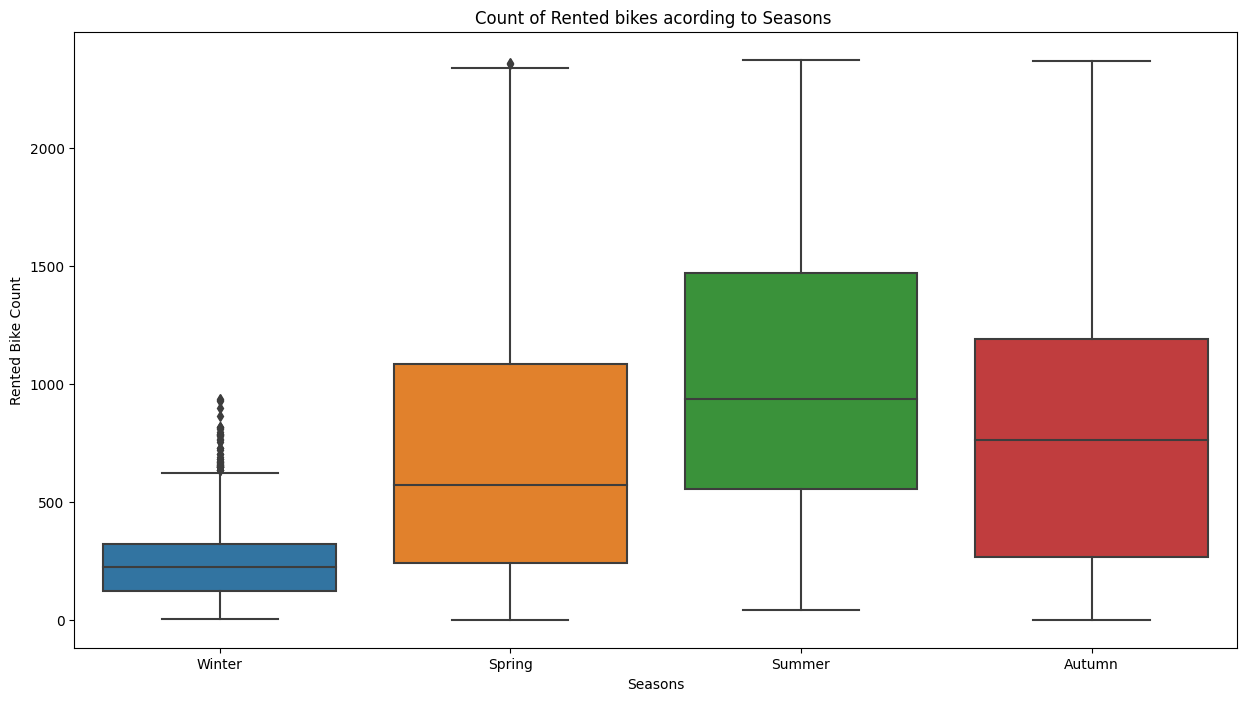

In [30]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

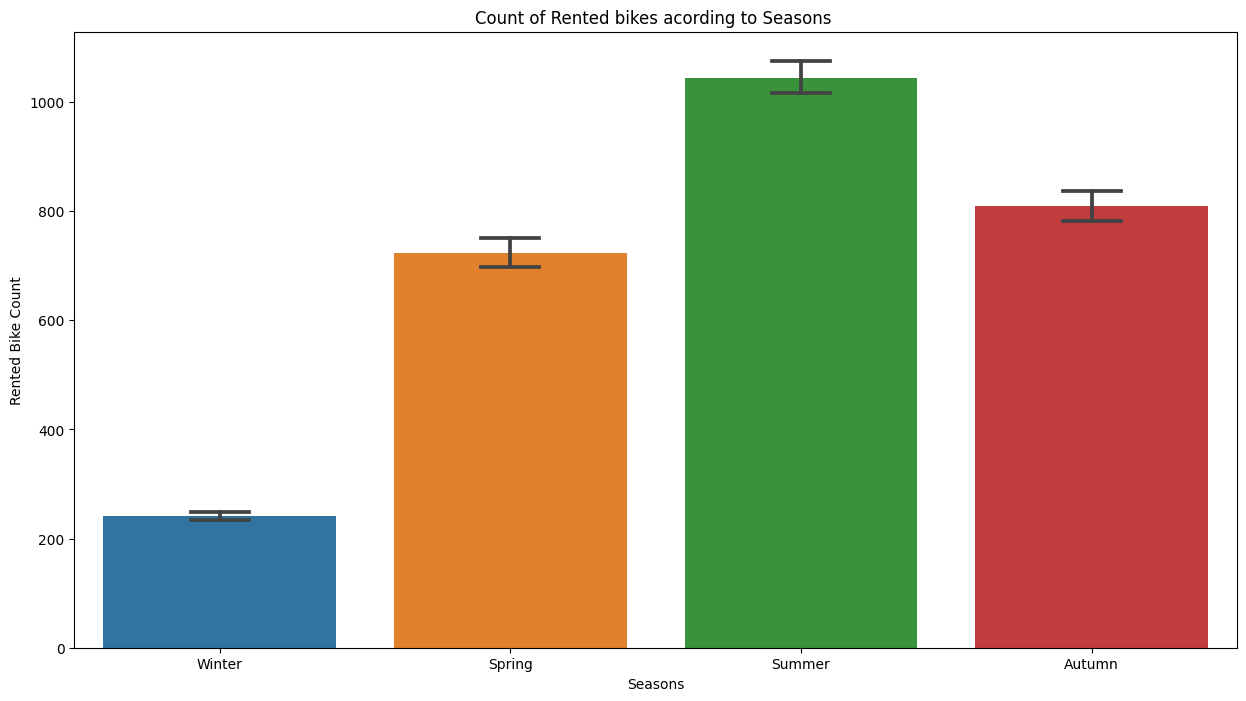

In [31]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [32]:
df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_24432\2129295609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_visi['Visibility (10m)'])


<Axes: xlabel='Visibility (10m)', ylabel='Density'>

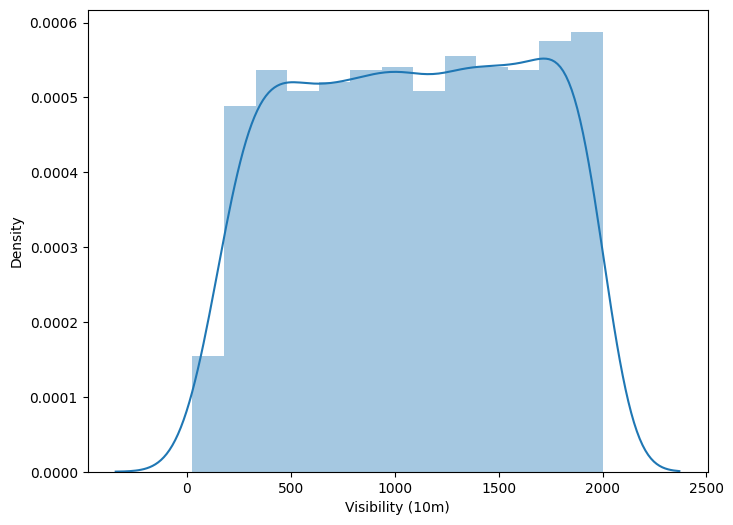

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])

In [34]:
seasons = pd.get_dummies(df['Seasons'])
working_day = pd.get_dummies(df['Holiday'])
F_day = pd.get_dummies(df['Functioning Day'])
month = pd.get_dummies(df['month'])
week_day = pd.get_dummies(df['week'])
df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,4,5,6,7,8,9,10,11,12,weekday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,0,1,1


In [35]:
df.drop(['Seasons','Holiday','Functioning Day','week','month'],axis=1,inplace=True)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for VIF calculation
numeric_columns = df.select_dtypes(include='number')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i)
                   for i in range(len(numeric_columns.columns))]
vif_data['VIF'] = round(vif_data['VIF'], 2)

print(vif_data)


                    feature    VIF
0         Rented Bike Count   2.51
1                      Hour   1.57
2           Temperature(°C)  10.37
3               Humidity(%)   2.58
4          Wind speed (m/s)   1.31
5          Visibility (10m)   2.17
6   Solar Radiation (MJ/m2)   1.66
7              Rainfall(mm)    NaN
8             Snowfall (cm)    NaN
9                    Autumn    inf
10                   Spring    inf
11                   Summer    inf
12                   Winter    inf
13               No Holiday   1.05
14                       No    inf
15                      Yes    inf
16                        1    inf
17                        2    inf
18                        3    inf
19                        4    inf
20                        5    inf
21                        6    inf
22                        7    inf
23                        8    inf
24                        9    inf
25                       10    inf
26                       11    inf
27                  

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [40]:
df=df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_24432\4106984187.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=(10,6))


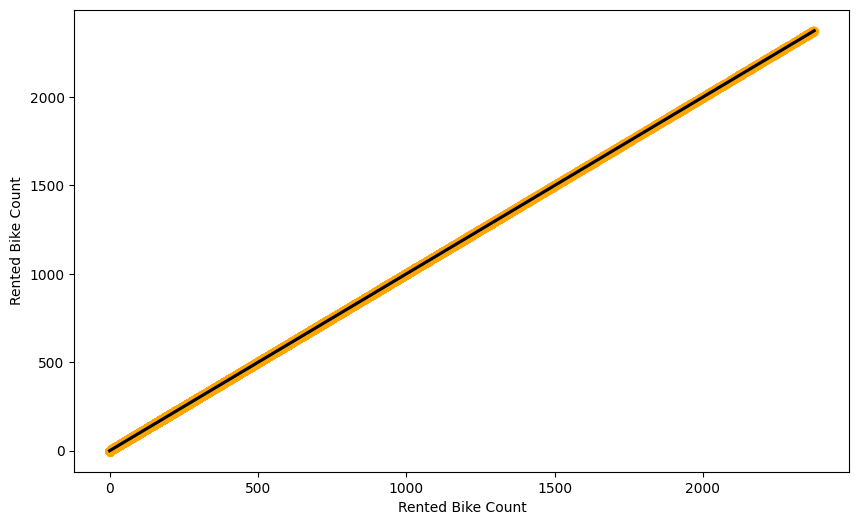

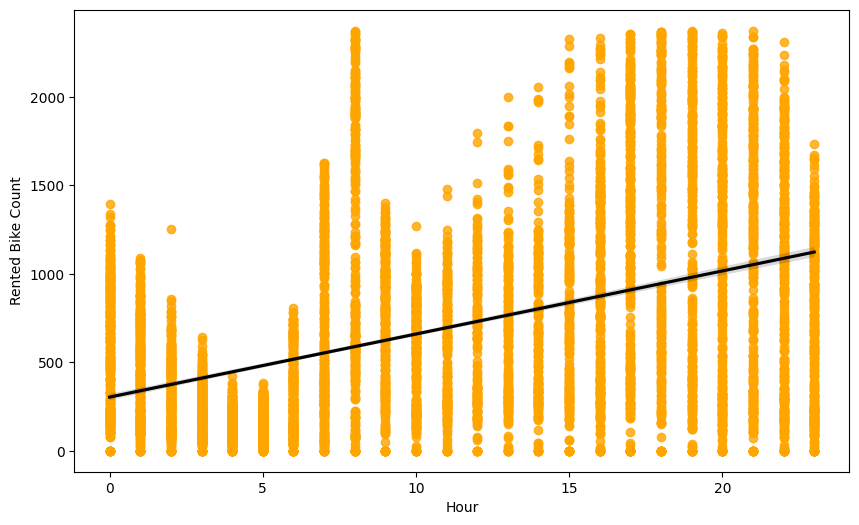

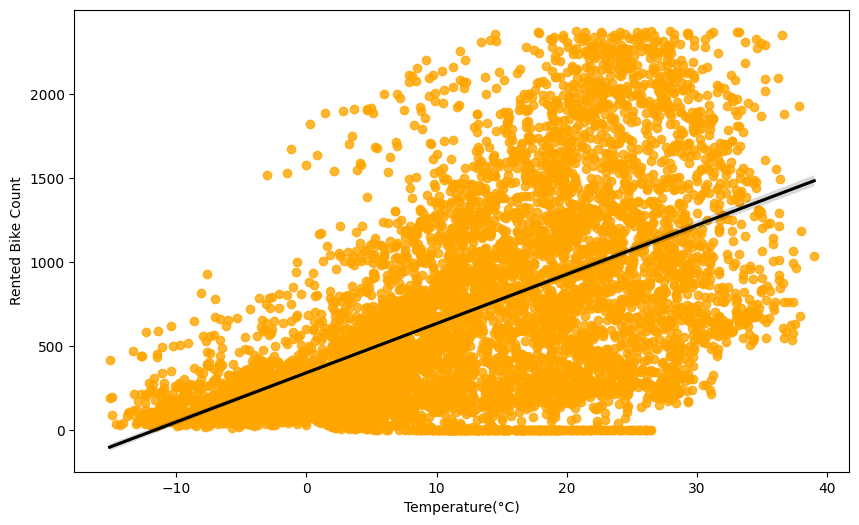

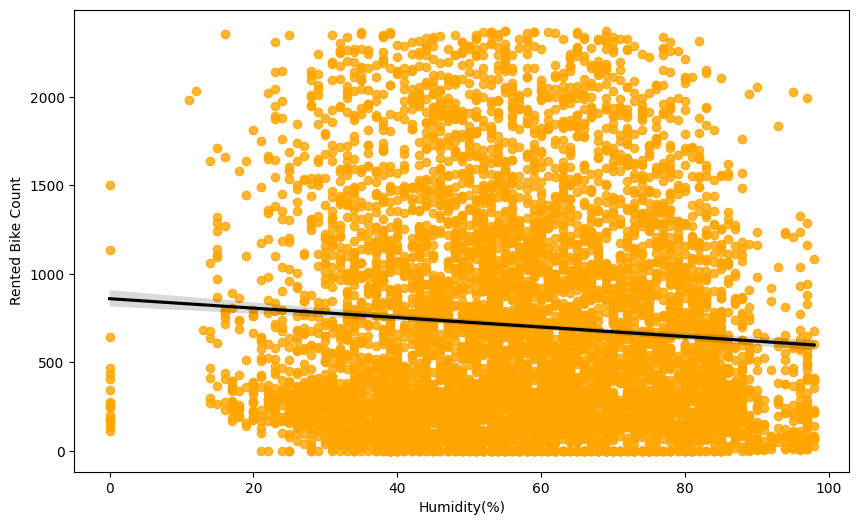

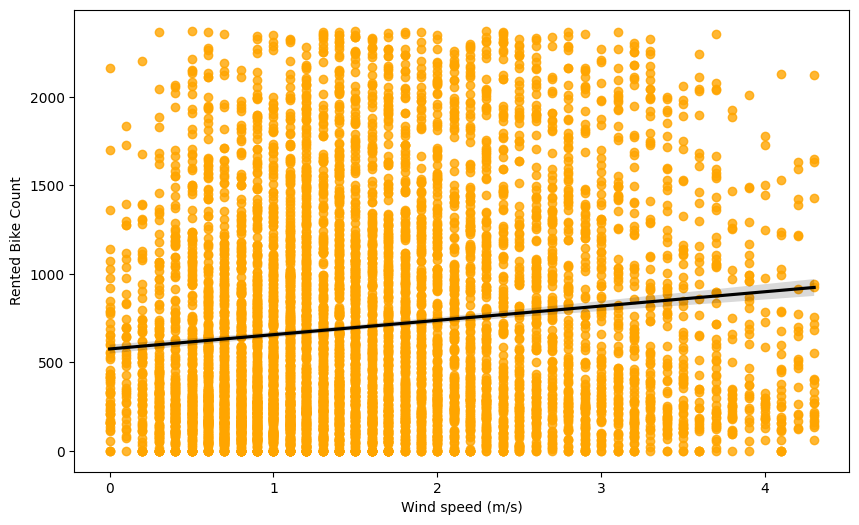

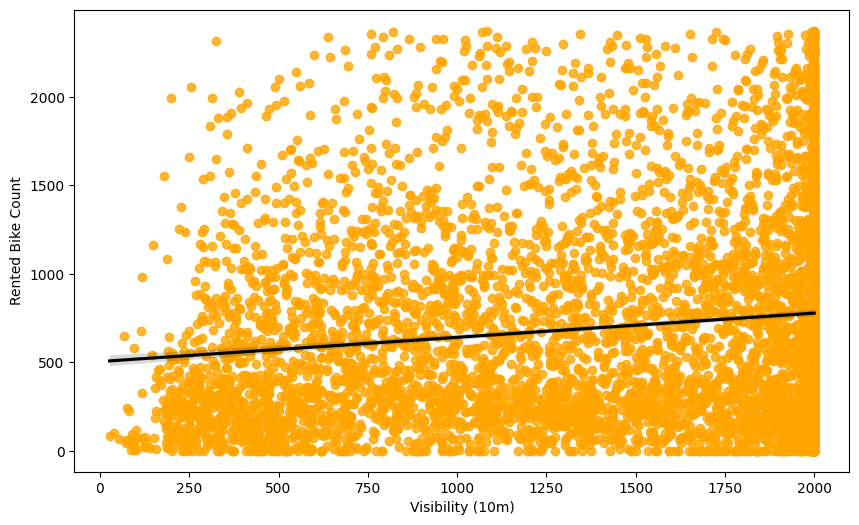

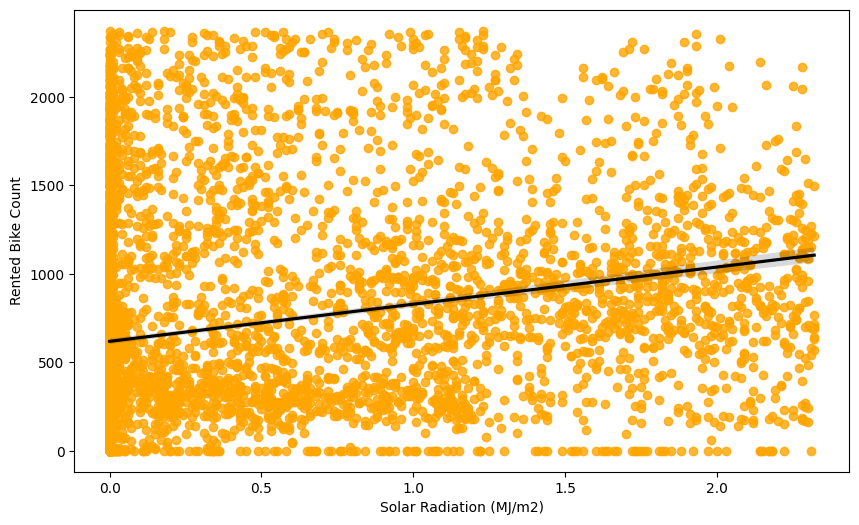

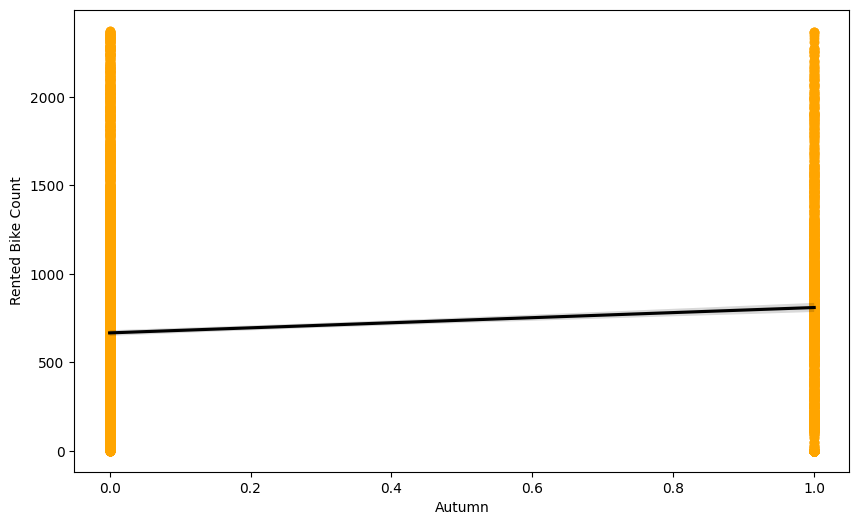

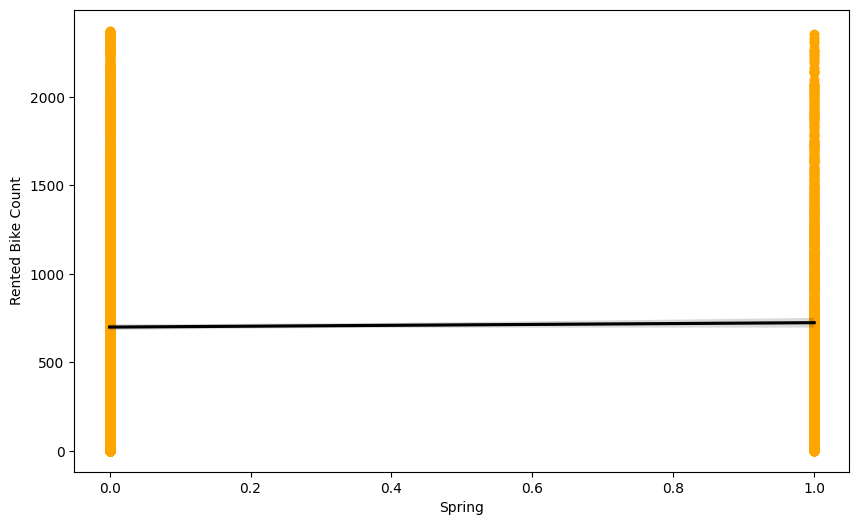

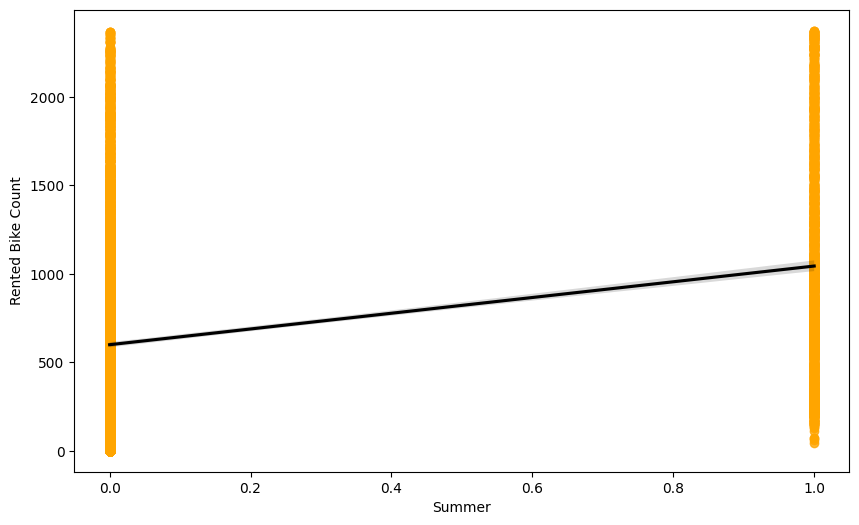

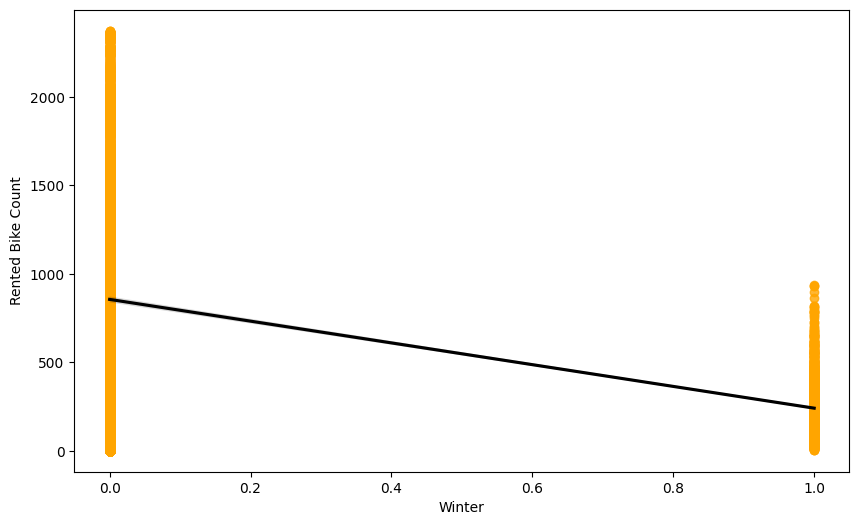

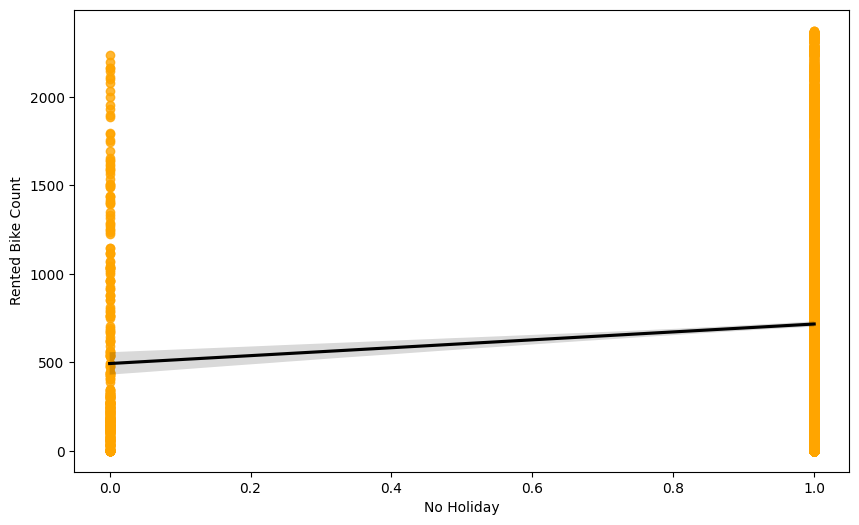

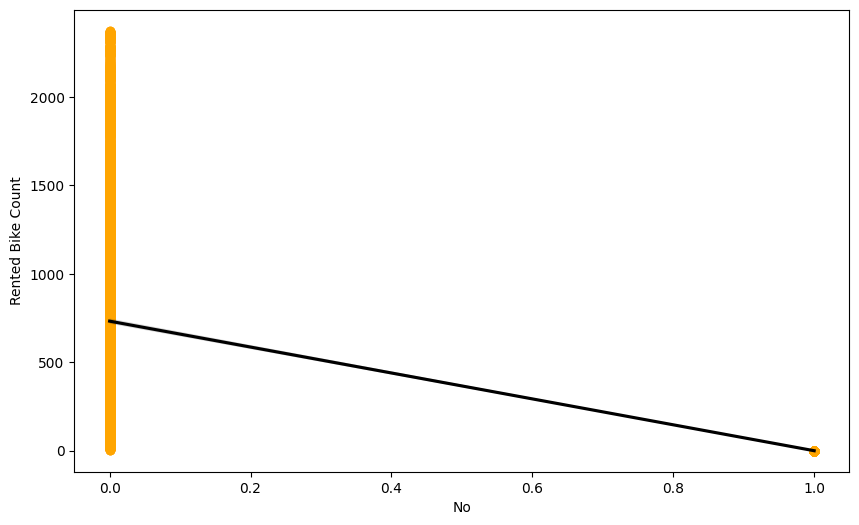

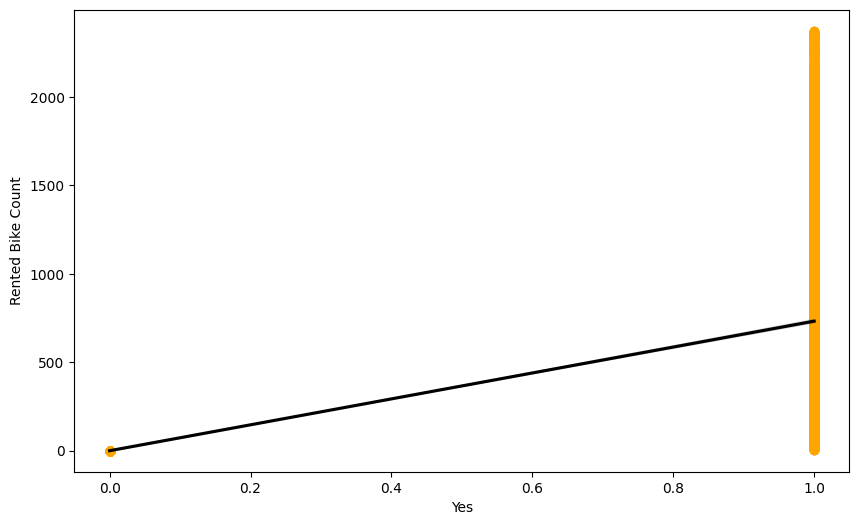

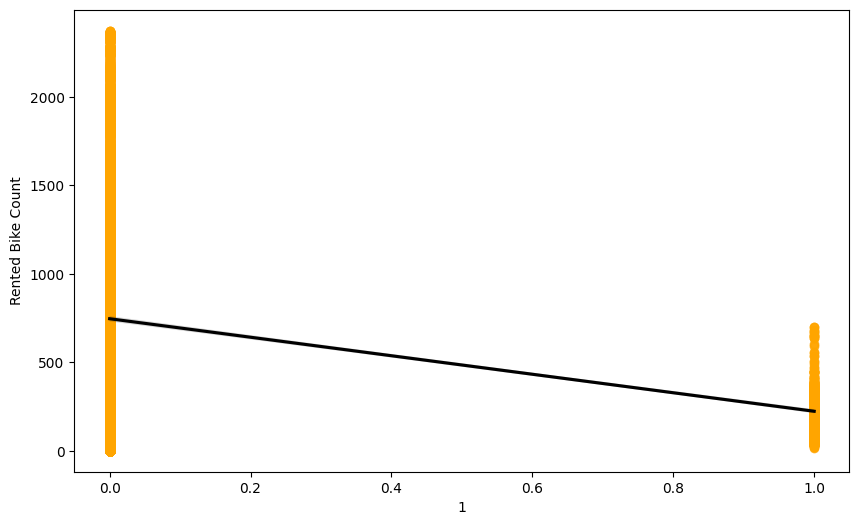

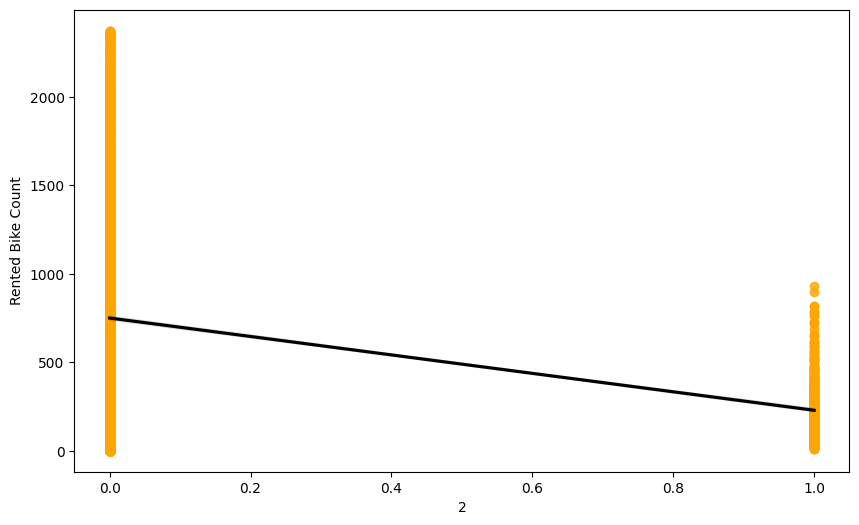

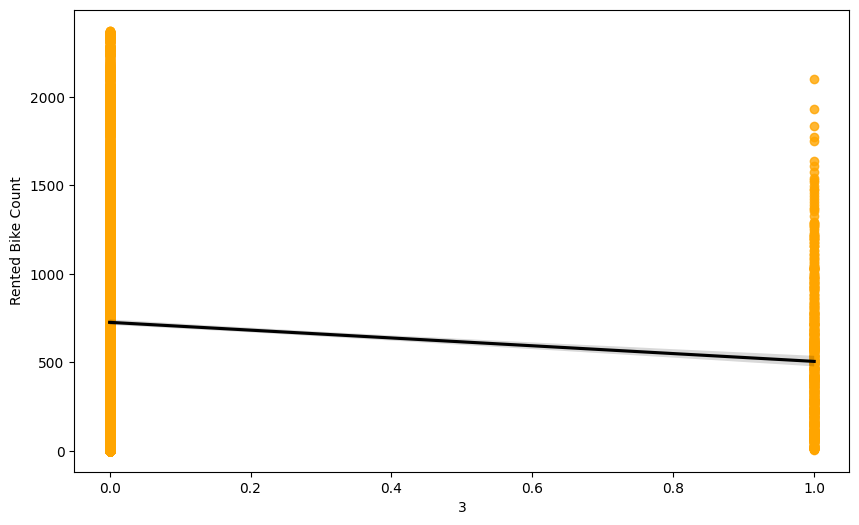

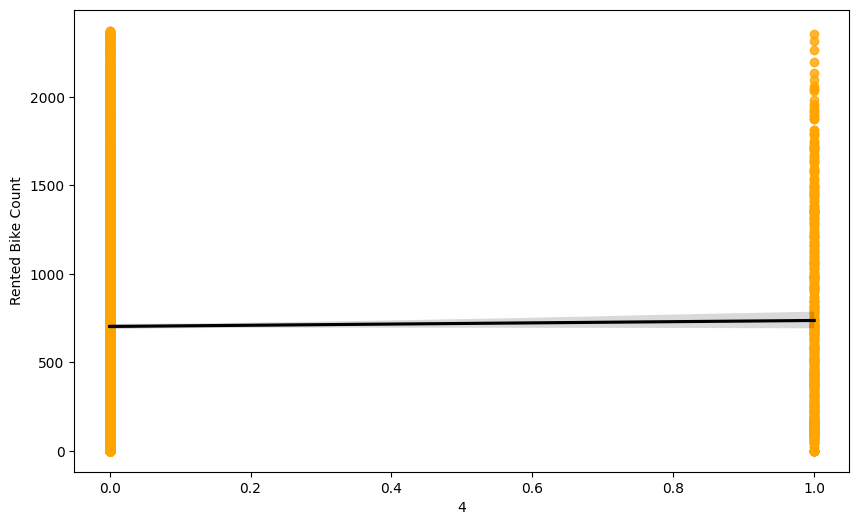

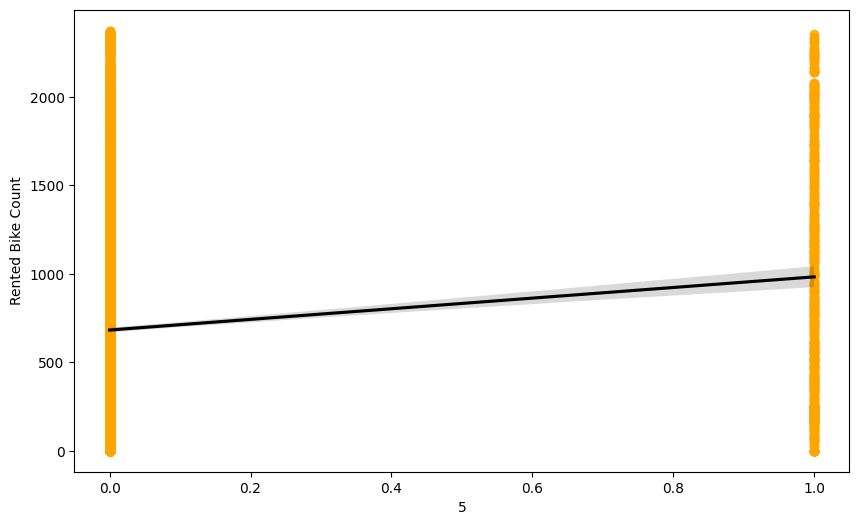

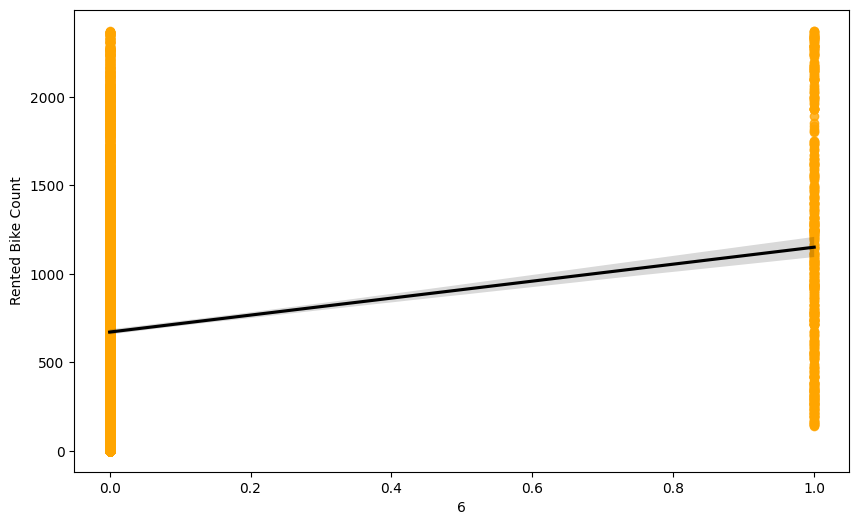

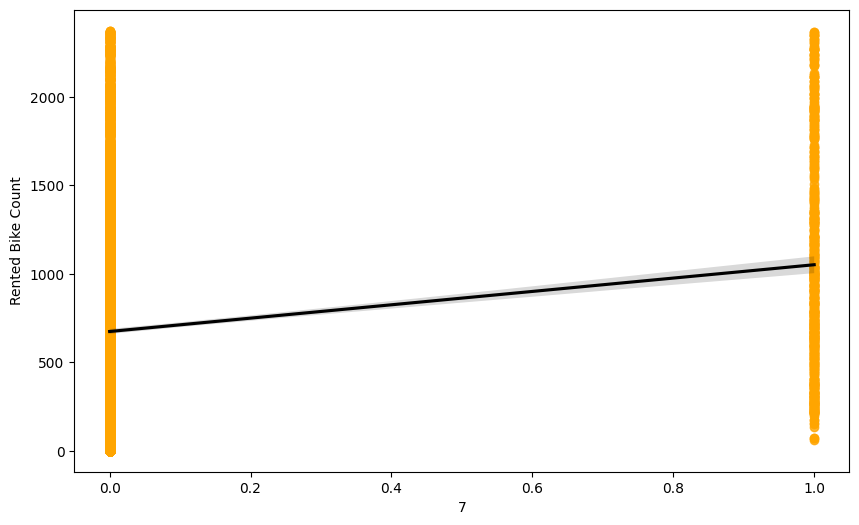

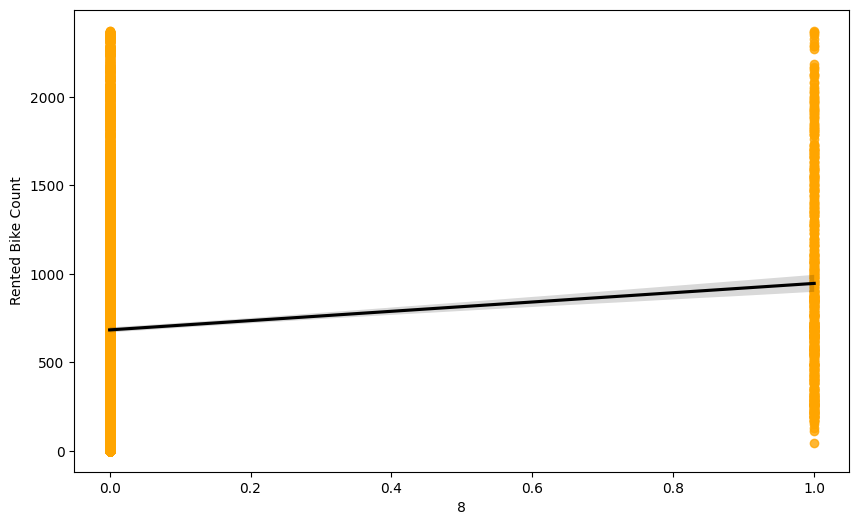

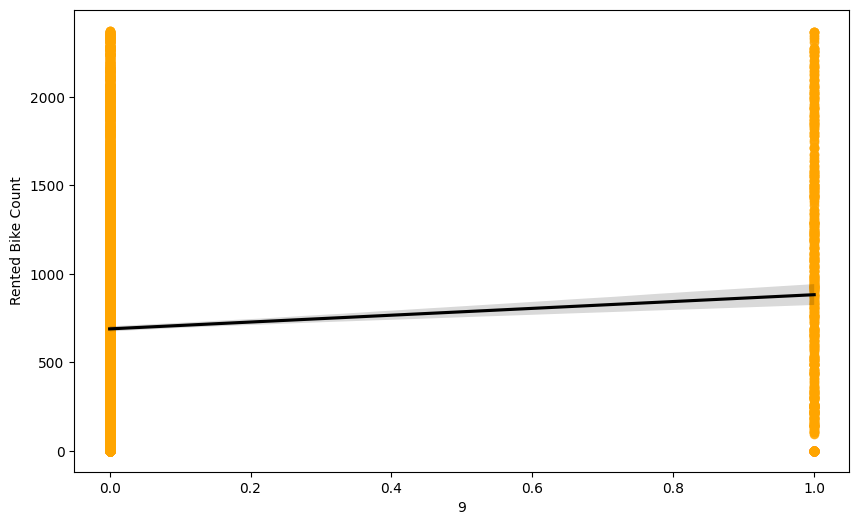

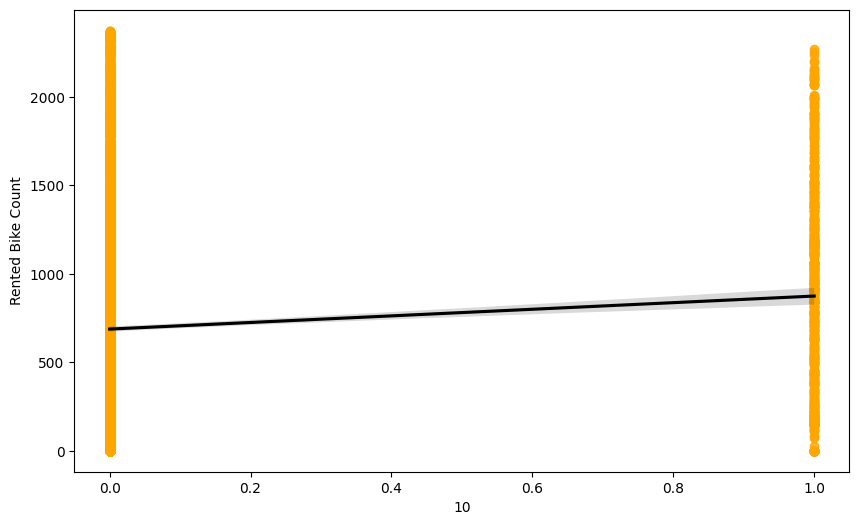

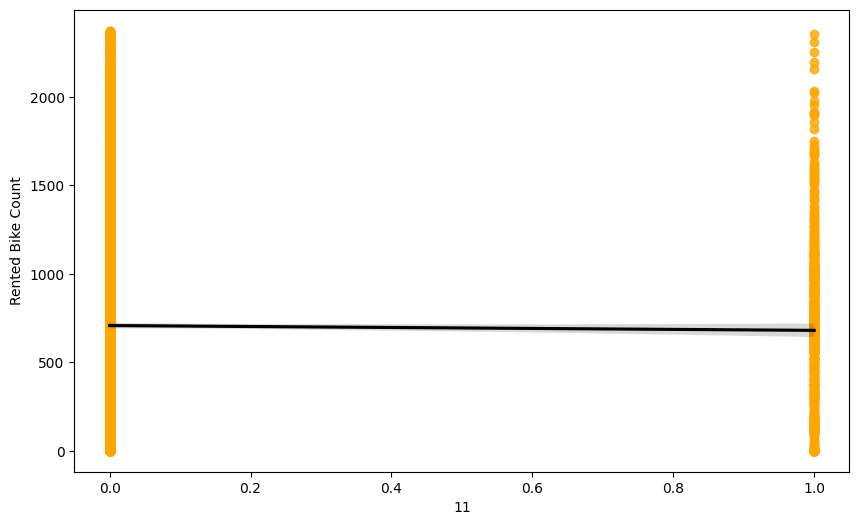

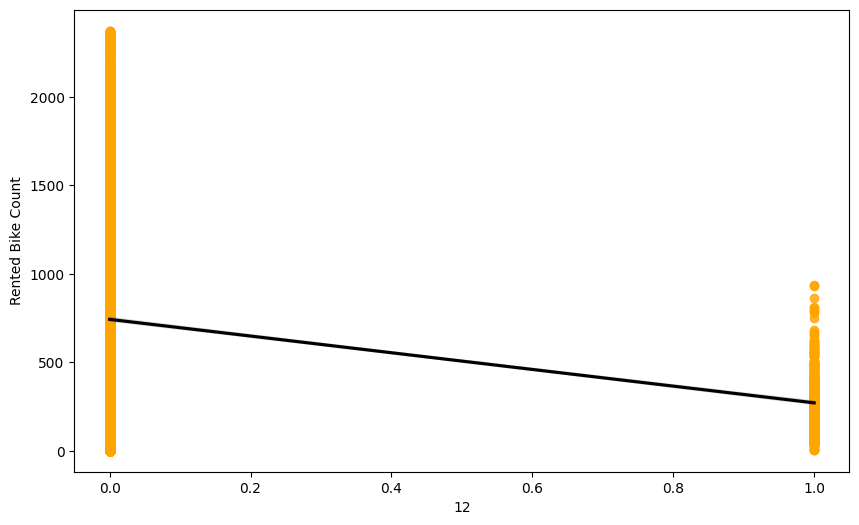

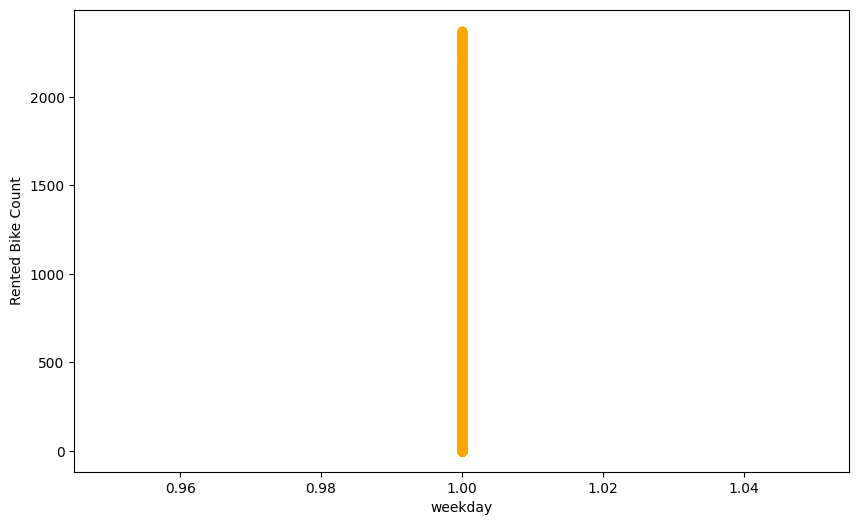

In [41]:
numerical_columns = df.select_dtypes(include='number')
for col in numerical_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

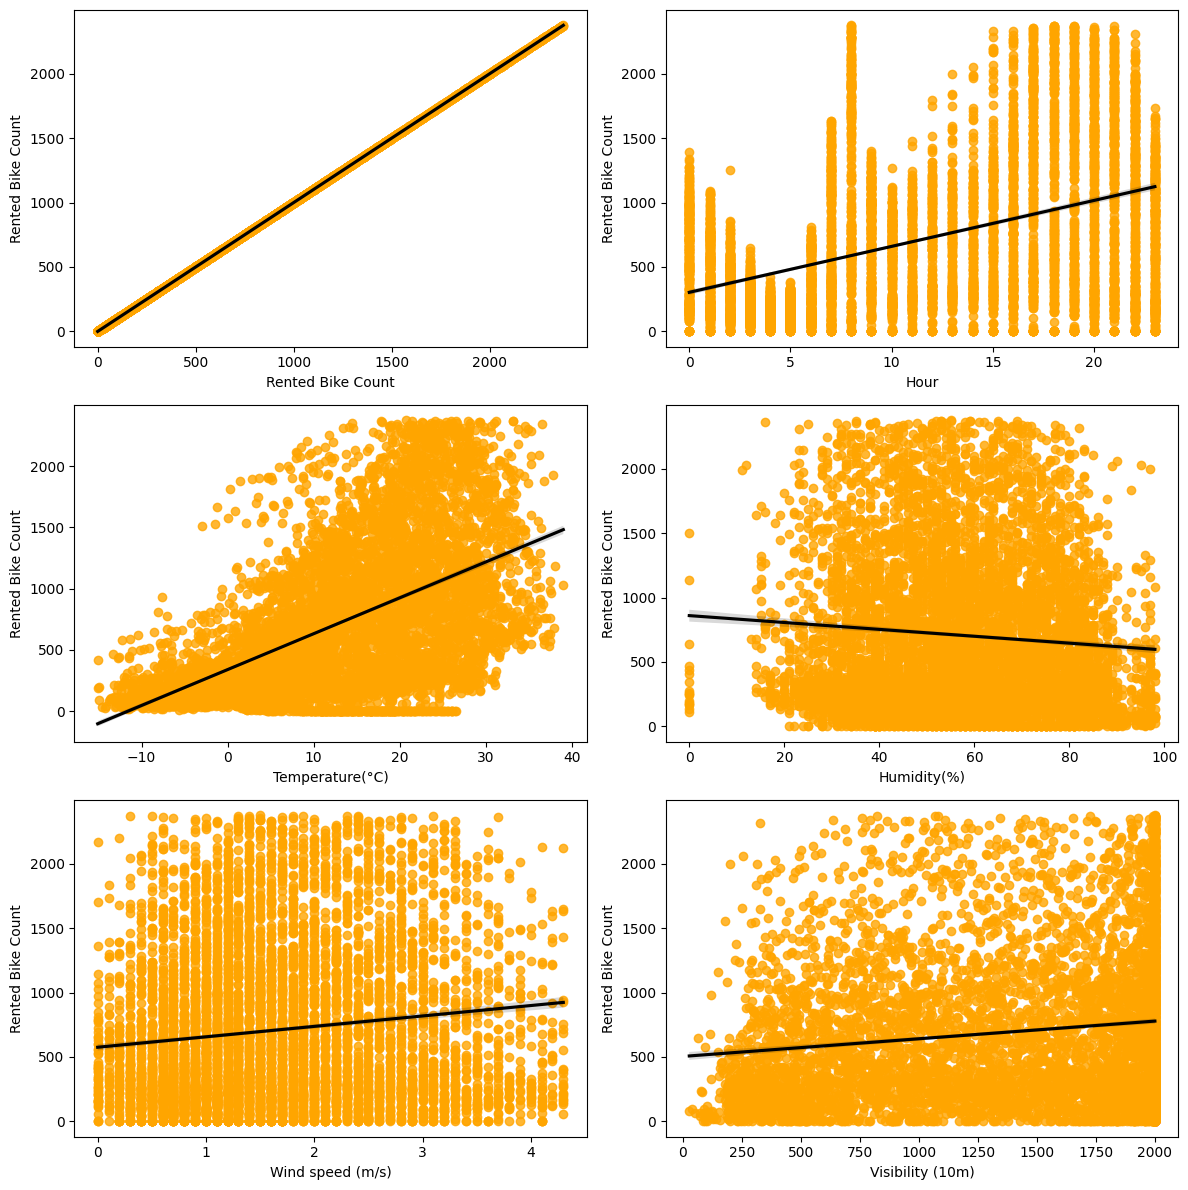

In [42]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number')

# Calculate the number of subplots to create
num_plots = min(len(numerical_columns), 6)

# Determine the number of rows and columns for the subplot grid
num_rows = (num_plots - 1) // 2 + 1
num_cols = min(num_plots, 2)

# Set up the grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot regression plots for each numerical column
for i in range(num_plots):
    col = numerical_columns.columns[i]
    sns.regplot(x=df[col], y=df['Rented Bike Count'], scatter_kws={"color": 'orange'}, line_kws={"color": "black"}, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Rented Bike Count')

# Remove any unused subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [43]:
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [44]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),date,Autumn,Spring,Summer,...,4,5,6,7,8,9,10,11,12,weekday
0,0,-5.2,37,2.2,2000,0.0,2017-12-01,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,-5.5,38,0.8,2000,0.0,2017-12-01,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2,-6.0,39,1.0,2000,0.0,2017-12-01,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,3,-6.2,40,0.9,2000,0.0,2017-12-01,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,4,-6.0,36,2.3,2000,0.0,2017-12-01,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [45]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert feature/column names to strings
X.columns = X.columns.astype(str)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

# Convert feature/column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Standardize the independent variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(5191, 27)
(1731, 27)


In [49]:
X['date'] = (X['date'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

C:\Users\Dell\AppData\Local\Temp\ipykernel_24432\828584297.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  X['date'] = (X['date'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'

In [51]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [52]:
reg.score(X_train, y_train)

0.6922990275319361

In [53]:
reg.coef_

array([ 3.76850533e+00,  5.49494568e+00, -1.62642730e+00,  3.46111463e-01,
        3.15722144e-01, -1.91279044e-03, -1.44268068e+00,  1.29494497e+00,
       -4.37606601e-02,  1.80337571e-01, -1.46987357e+00,  7.01458266e-01,
       -2.75168791e+00,  2.75168791e+00, -8.71158391e-01, -9.30950769e-01,
       -7.51345212e-01, -8.11229410e-02,  8.15360021e-01,  9.26195820e-01,
       -3.15840674e-02, -5.53401502e-01,  1.65427712e-01,  1.03465920e+00,
        7.77617563e-01, -4.90103053e-01,  0.00000000e+00])

In [54]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [55]:
y_pred_test

array([25.36455452, 35.70788379, 24.43149078, ..., -8.68450054,
       32.68306988, 20.84306587])

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE
MSE_lr = mean_squared_error(y_train, y_pred_train)
print("MSE:", MSE_lr)

# Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print("RMSE:", RMSE_lr)

# Calculate MAE
MAE_lr = mean_absolute_error(y_train, y_pred_train)
print("MAE:", MAE_lr)

# Calculate R2
r2_lr = r2_score(y_train, y_pred_train)
print("R2:", r2_lr)

# Calculate adjusted R2
Adjusted_R2_lr = (1 - (1 - r2_score(y_train, y_pred_train)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))

print("Adjusted R2:", Adjusted_R2_lr)

MSE: 42.80202544309258
RMSE: 6.542325690692308
MAE: 5.051150021021724
R2: 0.6922990275319361
Adjusted R2: 0.6874206210394888


In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# Evaluate metrics
# Calculate MSE
MSE = mean_squared_error(y_test, y_pred_test_ridge)
print("MSE:", MSE)

# Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate R2
r2_ridge_test = r2_score(y_test, y_pred_test_ridge)
print("R2:", r2_ridge_test)

# Calculate adjusted R2
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_test_ridge)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Adjusted R2:", adjusted_r2)


MSE: 43.582696267428375
RMSE: 6.601719190288873
R2: 0.6939818924968236
Adjusted R2: 0.6891301667759864


In [58]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train the ElasticNet model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train_en = elasticnet.predict(X_train)
y_pred_test_en = elasticnet.predict(X_test)

# Evaluate metrics
# Calculate MSE
MSE_e = mean_squared_error(y_train, y_pred_train_en)
print("MSE:", MSE_e)

# Calculate RMSE
RMSE_e = np.sqrt(MSE_e)
print("RMSE:", RMSE_e)

# Calculate MAE
MAE_e = mean_absolute_error(y_train, y_pred_train_en)
print("MAE:", MAE_e)

# Calculate R2
r2_e = r2_score(y_train, y_pred_train_en)
print("R2:", r2_e)

# Calculate adjusted R2
adjusted_r2_e = 1 - (1 - r2_score(y_train, y_pred_train_en)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Adjusted R2:", adjusted_r2_e)


MSE: 43.16905359203477
RMSE: 6.570316095290604
MAE: 5.105150992371203
R2: 0.6896604860801344
Adjusted R2: 0.6847402471630255


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Create and train the Decision Tree regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Calculate R2 score for training and test data
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)

# Print the R2 score for test data (DT)
print("DT R2 Score:", r2_test)


DT R2 Score: 0.831698915199001


In [60]:
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree regressor
regressor = DecisionTreeRegressor(random_state=0)

# Define the hyperparameter grid
param_grid = {'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]}

# Perform GridSearchCV to find the best hyperparameters
regressor_gs_cv = GridSearchCV(regressor, param_grid, scoring='r2', cv=5)
regressor_gs_cv.fit(X_train, y_train)

# Get the best estimator found by GridSearchCV
best_estimator = regressor_gs_cv.best_estimator_

# Calculate the R2 score for the test data with the best parameters
r2_score_dt = r2_score(y_pred_test, y_test)

# Calculate the R2 score for the test data with hyperparameter tuning
r2_score_dt_tuned = regressor_gs_cv.score(X_test, y_test)

# Print the R2 scores
print(f"The R2 score of the Decision Tree is: {r2_score_dt}")
print(f"The R2 score of the Decision Tree with hyperparameter tuning is: {r2_score_dt_tuned}")


The R2 score of the Decision Tree is: 0.831698915199001
The R2 score of the Decision Tree with hyperparameter tuning is: 0.8530923843718741


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Random Forest regressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=5)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

# Calculate MSE for the training set
MSE_train = mean_squared_error(y_train, pred_train)
print(f"MSE (Train): {MSE_train}")

# Calculate RMSE for the training set
RMSE_train = np.sqrt(MSE_train)
print(f"RMSE (Train): {RMSE_train}")

# Calculate R2 score for the training set
R2_score_train = r2_score(y_train, pred_train)
print(f"R2 Score (Train): {R2_score_train}")

# Calculate MSE for the test set
MSE_test = mean_squared_error(y_test, pred_test)
print(f"MSE (Test): {MSE_test}")

# Calculate RMSE for the test set
RMSE_test = np.sqrt(MSE_test)
print(f"RMSE (Test): {RMSE_test}")

# Calculate R2 score for the test set
R2_score_test = r2_score(y_test, pred_test)
print(f"R2 Score (Test): {R2_score_test}")


MSE (Train): 1.8373067076689593
RMSE (Train): 1.3554728723471228
R2 Score (Train): 0.986791721774394
MSE (Test): 13.798512469327344
RMSE (Test): 3.714634903907428
R2 Score (Test): 0.9031130463725279


In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting the values of SVR
param = {
    'C': [1, 5, 10],
    'degree': [3, 8],
    'coef0': [0.01, 10, 0.5],
    'gamma': ('auto', 'scale')
}

# Train the model
model_svr = SVR(kernel='rbf')
grid_search = GridSearchCV(model_svr, param, cv=3)
grid_search.fit(X_train, y_train)

# Predicting for both train and test sets
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Finding each of the metrics for the training set
print('Training Set Metrics:')
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('R2 Score:', r2_score(y_train, y_pred_train))

# Finding each of the metrics for the test set
svr = r2_score(y_test, y_pred_test)
print('\nTest Set Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('R2 Score:', r2_score(y_test, y_pred_test))


Training Set Metrics:
MAE: 3.827542897897012
MSE: 30.44482118037674
R2 Score: 0.7811341639363931

Test Set Metrics:
MAE: 4.06633777253778
MSE: 33.31296987336657
R2 Score: 0.7660912961097188


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Define the hyperparameters
param_dict = {
    'n_estimators': [50, 80, 100],
    'max_depth': [4, 6, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
}

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Perform grid search
gb_grid = GridSearchCV(estimator=gb_model, param_grid=param_dict, cv=5, verbose=2)
gb_grid.fit(X_train, y_train)

# Get the best estimator and best parameters
best_estimator = gb_grid.best_estimator_
best_params = gb_grid.best_params_

# Make predictions on train and test data
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test_1 = r2_score(y_test, y_pred_test)

print('Best Parameters:', best_params)
print('R2 Score (Train):', r2_train)
print('R2 Score (Test):', r2_test_1)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_sam

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=80; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=10

Text(0.5, 0, 'Actual Values')

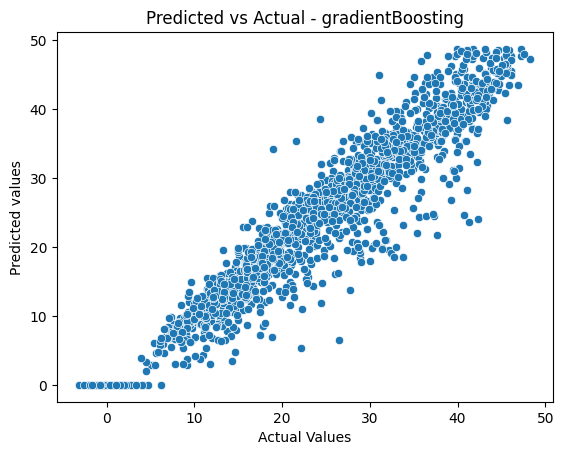

In [64]:
#visualizing the predictions
sns.scatterplot(x=y_pred_test,y=y_test)
plt.title('Predicted vs Actual - gradientBoosting')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

In [65]:
models = ['Ridge_model', 'elasticnet', 'Decision_Tree_model', 'Decision_Tree_model_gridcv', 'random_forest', 'SVR', 'gradient']
R2_value = [r2_ridge_test, r2_e, r2_test, r2_score_dt_tuned, R2_score_test, svr, r2_test_1]

compare_models = pd.DataFrame([R2_value], columns=models, index=['r2_value'])

In [66]:
compare_models

,Ridge_model,elasticnet,Decision_Tree_model,Decision_Tree_model_gridcv,random_forest,SVR,gradient
r2_value,0.693982,0.68966,0.831699,0.853092,0.903113,0.766091,0.907657
